(10, 10)


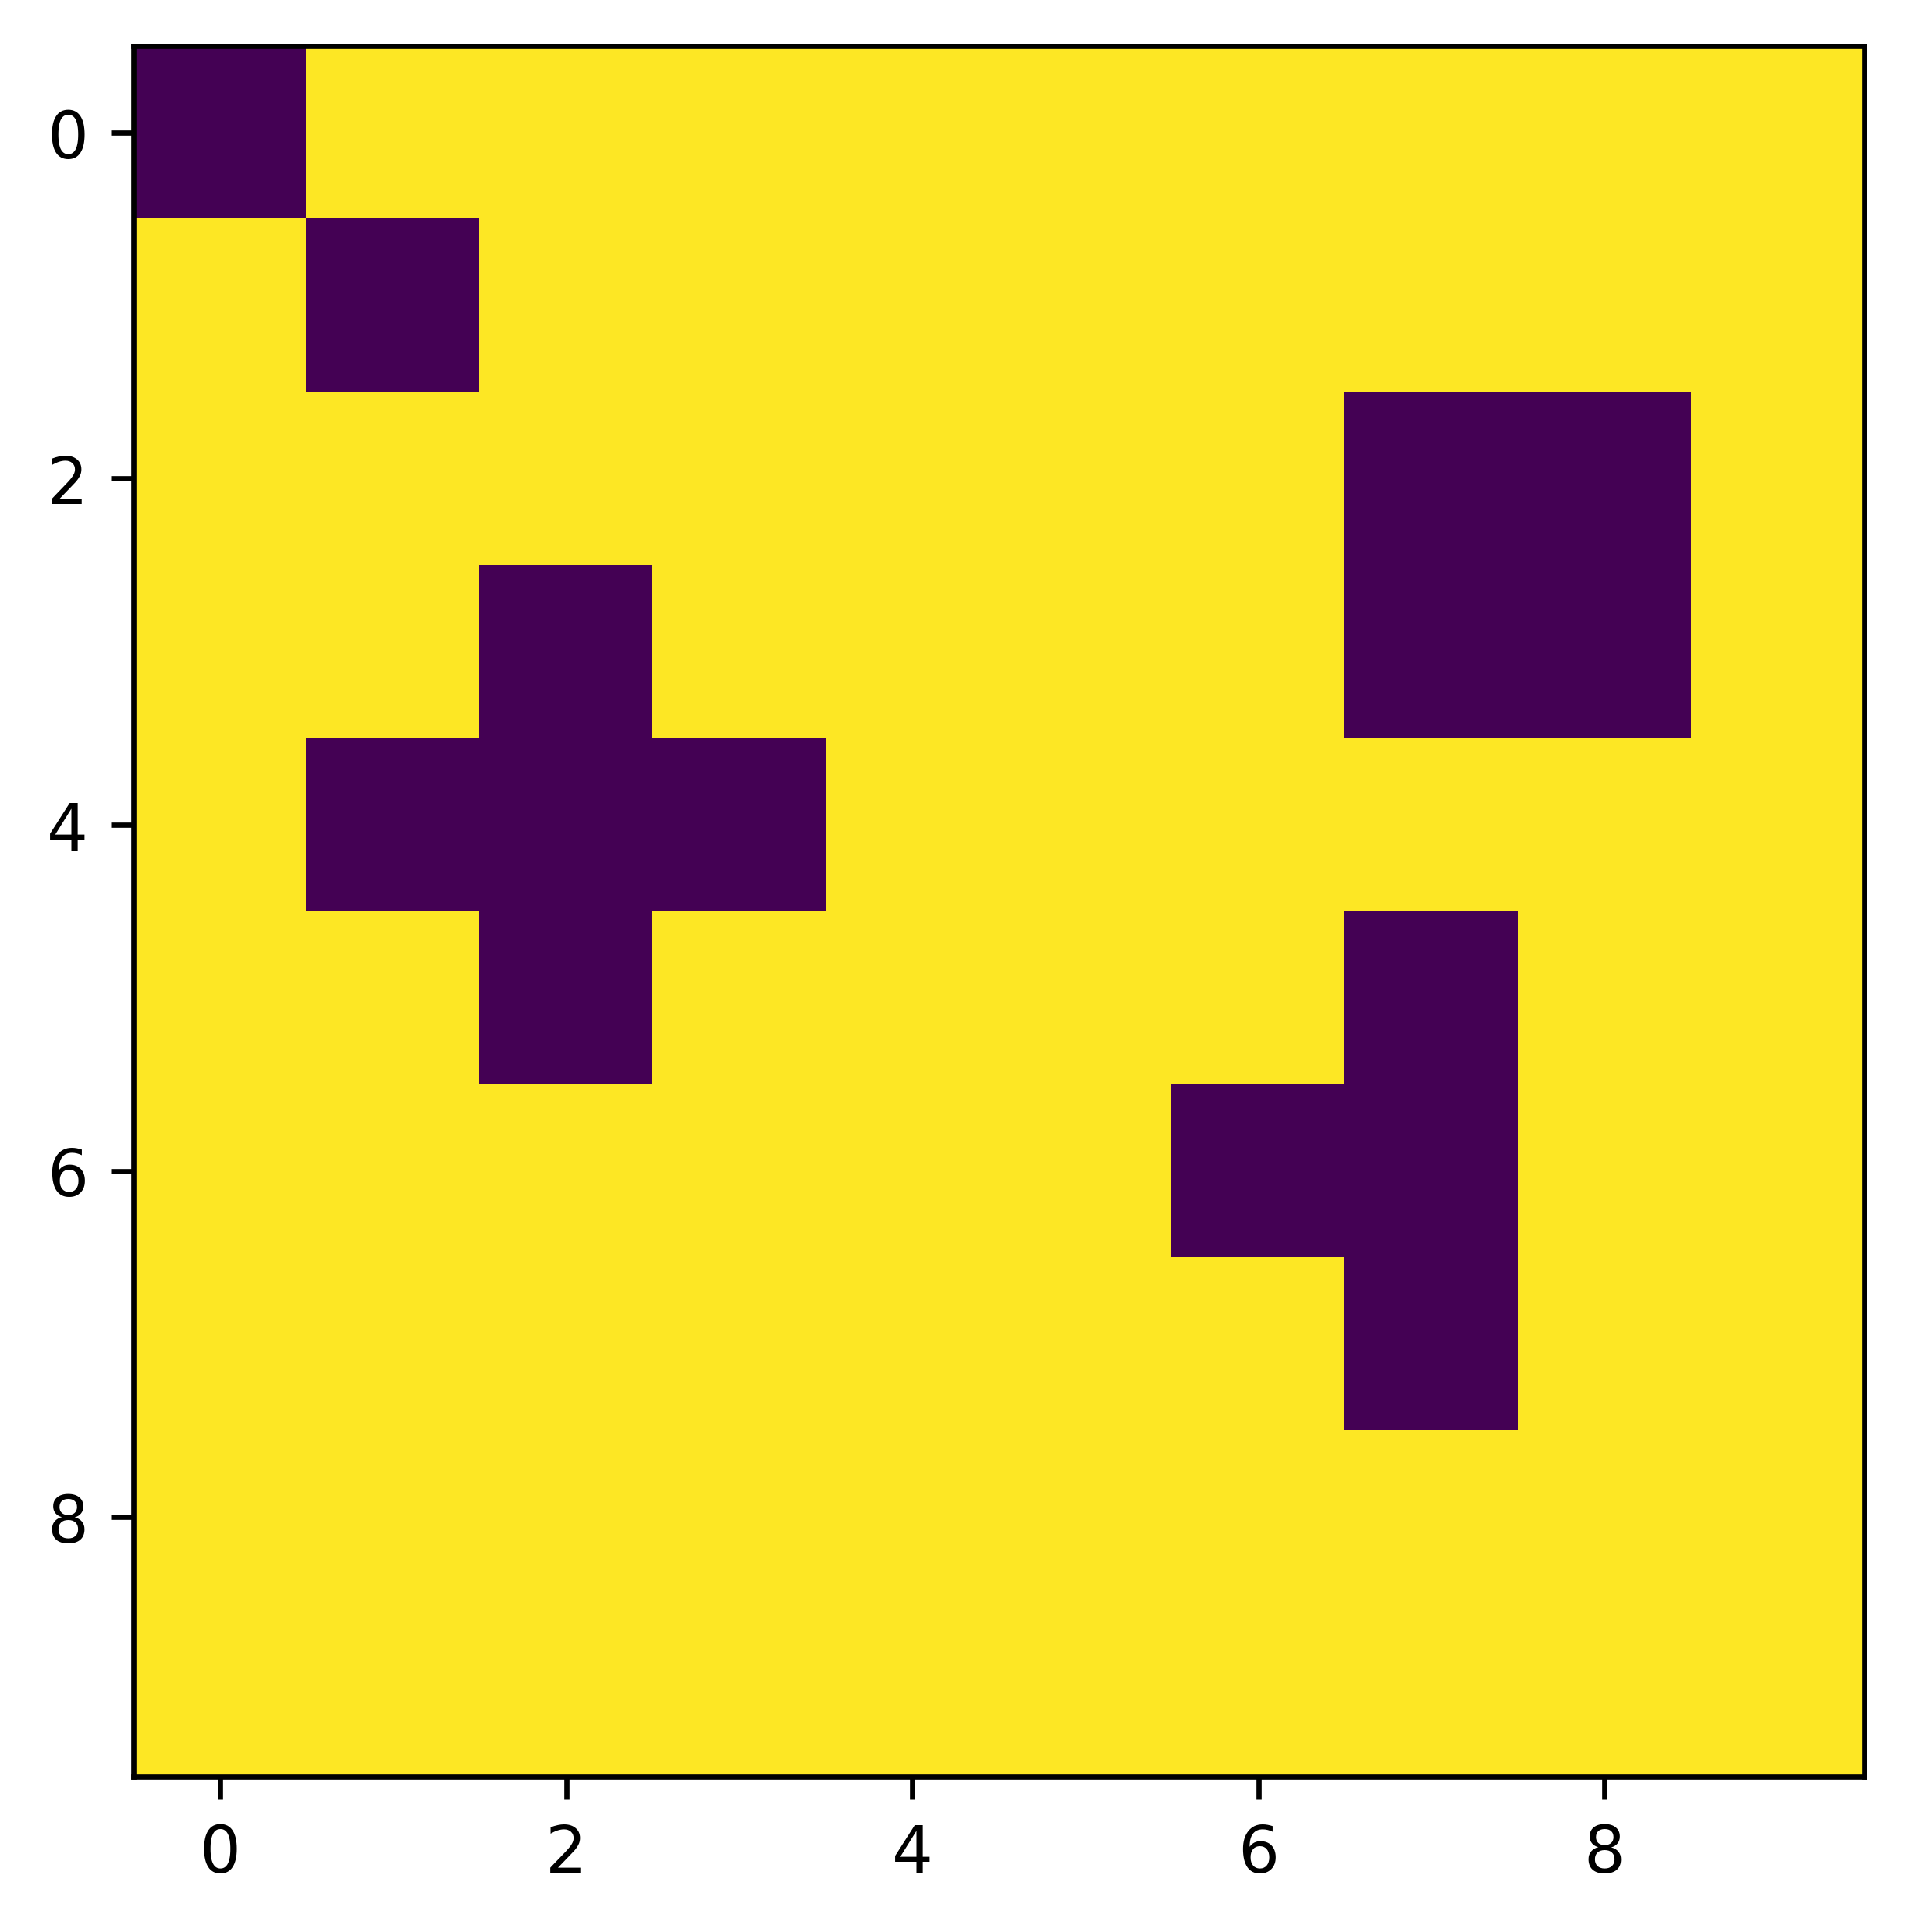

In [1]:
import numpy as np
import matplotlib.pylab as plt 
import imageio.v3 as iio
import networkx as nx
from itertools import count


def graph_atributo(G,atributo,label=False):
    plt.figure(dpi=400)
    groups = set(nx.get_node_attributes(G,atributo).values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[G.nodes[n][atributo]] for n in nodes]

    # drawing nodes and edges separately so we can capture collection for colobar
    pos = nx.spring_layout(G,iterations=400)
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    lc = nx.draw_networkx_labels(G, pos,font_size=8)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=100, cmap=plt.cm.jet)
    
    plt.colorbar(nc)
    plt.axis('off')
    plt.show()

def matriz_nn(n):
    nn=n*n
    M=np.zeros((nn,nn),dtype=int)
    
    for i in range(nn):
        for j in range(nn):
            if i+n==j or i-n==j:
                M[i,j]=1


            if i+1==j or i-1==j:
                M[i,j]=1

            if i==j:
                # print(M[i,j])
                if i!=nn-1:
                    
                    if  i%n==0 and i!=0:
                        M[i-1,j]=0
                        M[i,j-1]=0

    return M
def sort_dict_value(dic):    
    return sorted(dic.items(), key=lambda x:x[1])

im = iio.imread('./Environment/mapa_v5.png')
mapa=np.array(im)
mapa_b=mapa>250
mapa_c=mapa_b[:, :, 0]*1
np.savetxt("./Environment/Acceso.csv", mapa_c, delimiter=",",fmt='%0d')
print(mapa_c.shape)
plt.figure(dpi=600)
plt.imshow(mapa_c)

(10, 10)
1 10
2 11
3 12
4 13
5 14
6 15
7 16
8 17
9 18
11 20
12 21
13 22
14 23
15 24
16 25
17 26
18 27
19 28
21 30
22 31
23 32
24 33
25 34
26 35
27 36
28 37
29 38
31 40
32 41
33 42
34 43
35 44
36 45
37 46
38 47
39 48
41 50
42 51
43 52
44 53
45 54
46 55
47 56
48 57
49 58
51 60
52 61
53 62
54 63
55 64
56 65
57 66
58 67
59 68
61 70
62 71
63 72
64 73
65 74
66 75
67 76
68 77
69 78
71 80
72 81
73 82
74 83
75 84
76 85
77 86
78 87
79 88
81 90
82 91
83 92
84 93
85 94
86 95
87 96
88 97
89 98


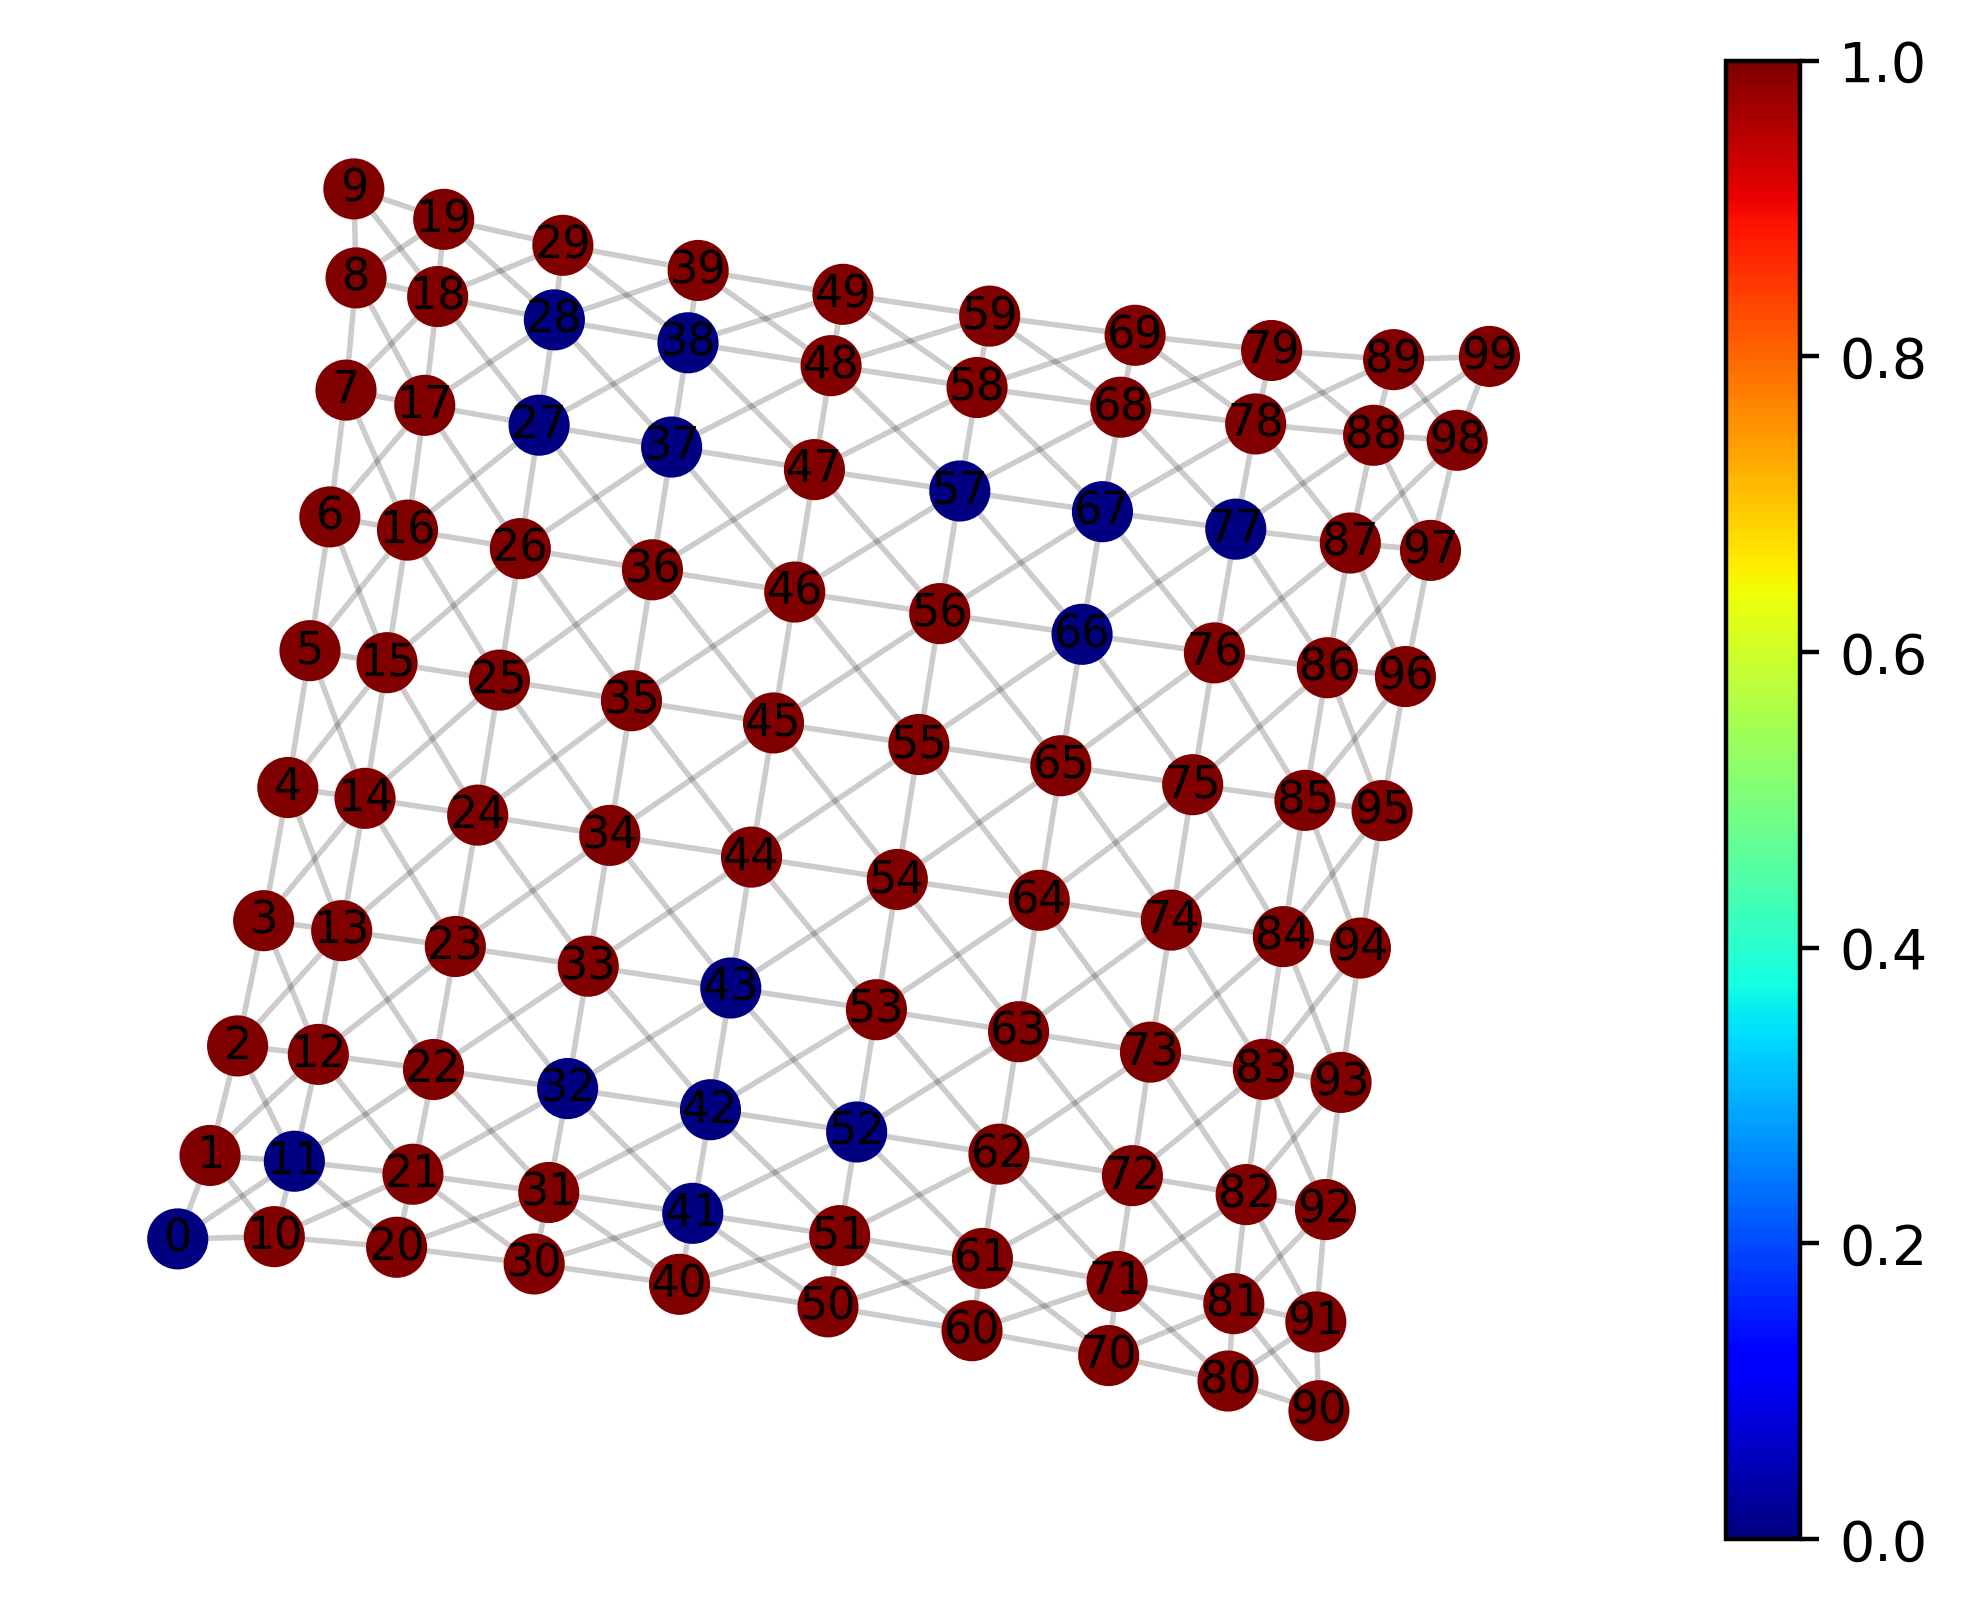

In [2]:
G=nx.Graph()
n=mapa_c.shape[0]
nx.set_node_attributes(G, 0, "Aceso")
for i in range(mapa_c.shape[0]):
    for j in range(mapa_c.shape[1]):
        k=str(i*n+j)
        G.add_node(k)
        G.nodes[k]["Aceso"]=mapa_c[i,j]

print(mapa_c.shape)
for i in range(mapa_c.shape[0]):
    for j in range(mapa_c.shape[1]):

            k=str(i*n+j)
            kd=str((i+1)*n+j)
            kb=str(i*n+(j+1))
            k_diagonal1=str((i+1)*n+(j+1))
            k_diagonal2=str((i+1)*n+(j-1))
            
            if not i+1==mapa_c.shape[0] and not j+1==mapa_c.shape[1]:
                 G.add_edge(k,k_diagonal1)

            if not i+1==mapa_c.shape[0] and j!=0:
                 G.add_edge(k,k_diagonal2)
                 print(k,k_diagonal2)

            if i+1==mapa_c.shape[0]:
                if j+1<mapa_c.shape[1]:
                    G.add_edge(k,kb)
            elif j+1==mapa_c.shape[1]:
                
                G.add_edge(k,kd)

            else :

                G.add_edge(k,kd)
                G.add_edge(k,kb)

graph_atributo(G,"Aceso")

In [3]:



Ac=sort_dict_value(nx.get_node_attributes(G,"Aceso"))
for node_p in Ac:
    if node_p[1]==0:
        node=node_p[0]
        edges=list(G.edges(node))
        for edge in edges:
            print(edge[1])
            G.remove_edge(edge[0],edge[1])
A = nx.to_numpy_array(G)
#print(A)
plt.show()
M=matriz_nn(4)
np.savetxt("R.csv", A, delimiter=",",fmt='%0d')

11
10
1
1
2
10
22
20
21
12
16
17
18
26
38
36
37
28
17
18
19
39
37
38
29
21
22
23
31
43
41
42
33
26
36
48
46
47
38
29
49
47
48
39
30
31
40
52
50
51
42
31
33
53
51
52
43
33
34
54
52
53
44
51
63
61
62
53
46
47
48
56
68
66
67
58
55
56
65
77
75
76
67
56
58
78
76
77
68
68
76
88
86
87
78


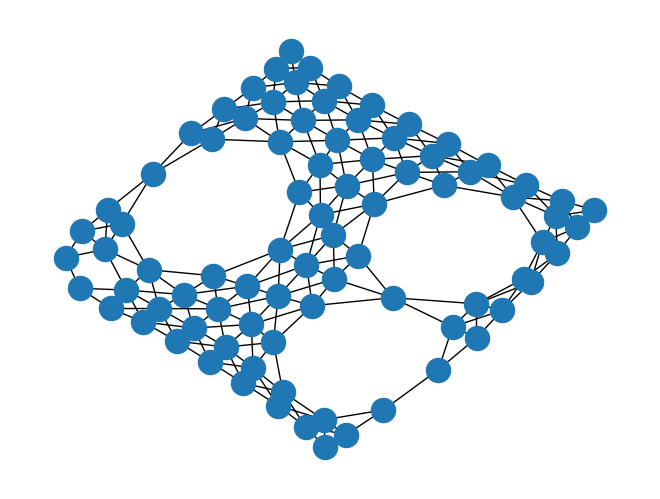

In [4]:
r=np.loadtxt('./R.csv',dtype="int",delimiter=',')
R = nx.from_numpy_array(r)
R.remove_nodes_from(list(nx.isolates(R)))
pos_r=nx.spring_layout(R,iterations=1000)
nx.draw(R,pos=pos_r)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23008\3058964903.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  r2=np.loadtxt('./Environment/Matriz_adyacencia_mapa.csv',dtype="int",delimiter=',')


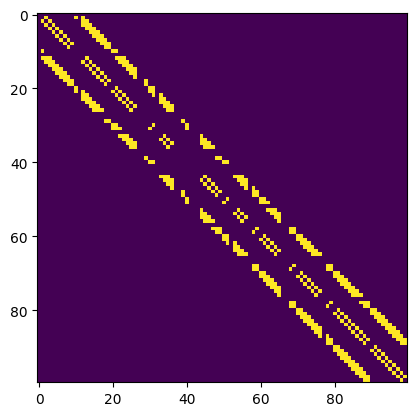

In [7]:
r1=np.loadtxt('./R.csv',dtype="int",delimiter=',')
r2=np.loadtxt('./Environment/Matriz_adyacencia_mapa.csv',dtype="int",delimiter=',')
r2[r2==9999]=0
# print(r2)
plt.imshow(r1+r2)

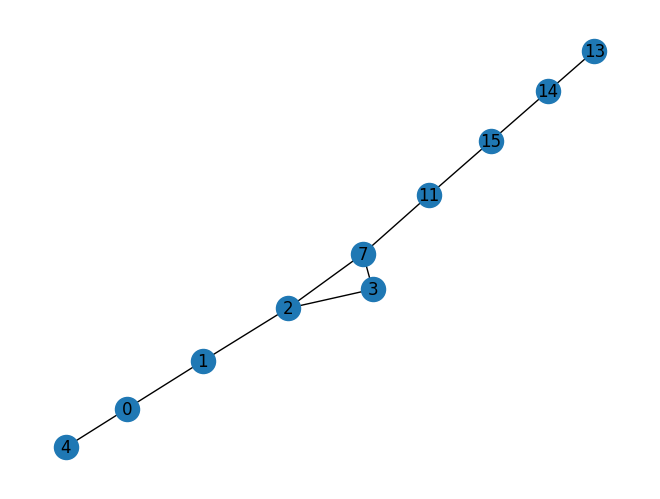

In [6]:

r=np.loadtxt('./Environment/Matriz_adyacencia_mapa.csv',dtype="int",delimiter=',')
r[r==9999]=0
R = nx.from_numpy_array(r)
R.remove_nodes_from(list(nx.isolates(R)))
pos_r=nx.spring_layout(R,iterations=1000)
nx.draw(R,pos=pos_r,with_labels=True)

[]


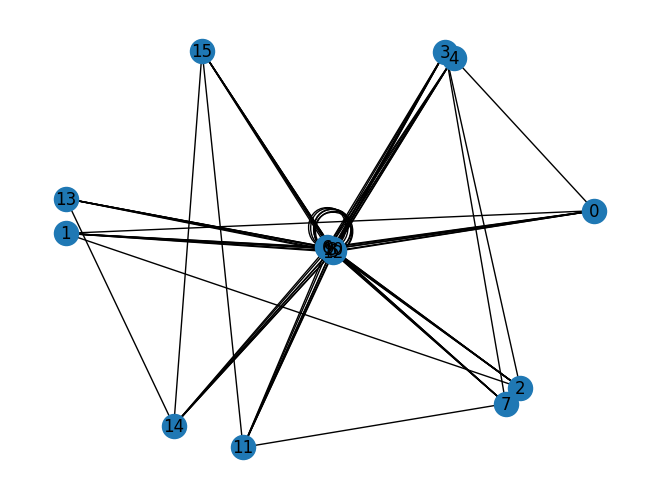

In [7]:
r=np.loadtxt('./Environment/Matriz_adyacencia_mapa.csv',dtype="int",delimiter=',')
R = nx.from_numpy_array(r)
R.remove_nodes_from(list(nx.isolates(R)))
print(list(nx.isolates(R)))
pos_r=nx.spring_layout(R,iterations=1000)
# print(nx.dijkstra_path(R, 1, 31))
nx.draw(R,pos=pos_r,with_labels=True)